### Analysis of MovieLens Data

We are provided with the MovieLens data collected by the GroupLens Research Project at the University of Minnesota.
In particular, the data was collected through the MovieLens web site (movielens.umn.edu), which records a number of users' ratings (1-5) towards their watched movies. Besides, simple demographic info (e.g., age and gender) for the users and descriptive info (e.g., title and genre) for the movies are provided. 

Originally, there are several separate files to record the user-movie rating info, user demographic info and movie descriptive info, we have conducted preliminary processing to map and merge the data into one csv file named 'movielens_data.csv'. The header of the csv file is shown below. 

| userId | age | gender | occupation| movieId | rating | genre | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __age__ - the user's age
* __gender__ - the user's gender
* __occupation__ - the user's occupation
* __movieId__ - the movie's id
* __rating__ - the user's rating towards the movie
* __genre__ - the genre of the movie
* __timestamp__ - the timestamp indicating when the user rated the movie

Note that, a same user (i.e., a same userId) corresponds to a same age/gender/occupation; a same movie (i.e., a same movieId) corresponds to a same genre; a same user (i.e., a same userId) may rate multiple movies and a same movie (i.e., a same movieId) may receive ratings from multiple users.

There are four questions to explore with the data as shown below.

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
#rawdf is the uncleaned dataframe
rawdf = pd.read_csv('files/movielens_data.csv') 

 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * age/gender/rating is missing
 * occupation is 'none'

__Print the length of the data__ before and after removing the missing data.  

In [4]:
## Length of the Data before removing the missing values
print("Data Length Before Filtering | (Rows, Columns):",len(rawdf))

Data Length Before Filtering | (Rows, Columns): 100000


In [5]:
#Q1 Remove missing data
ageNotNull= rawdf['age'].notnull() #Storing all conditions in a variable for better readility
genderNotNull = rawdf['gender'].notnull() 
ratingNotNull = rawdf['rating'].notnull()
occupationNotNone = rawdf["occupation"]!="none"

df = rawdf[ageNotNull& genderNotNull & ratingNotNull & occupationNotNone] #df will be the filtered Dataframe

print("Data Length After Filtering | (Rows, Columns):",len(df)) #Length of the data after removing missing values
print("Filtered Out Data",len(rawdf)-len(df)) #Length of the data after removing missing values

Data Length After Filtering | (Rows, Columns): 99022
Filtered Out Data 978


* 978 rows were filtered out because of missing values. 

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique occupations, unique movies, and unique genres
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of movies rated by each user 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each movie 


In [6]:
# Q2.1 total number of unique users, unique occupations, unique movies, and unique genres
print("Total Unique Users:",df['userId'].nunique()) #nunique function counts the unique values.
print("Total Unique Occupations:", df['occupation'].nunique())
print("Total Unique Movies:",df['movieId'].nunique())
print("Total Unique Genres:",df['genre'].nunique()) 

Total Unique Users: 934
Total Unique Occupations: 20
Total Unique Movies: 1682
Total Unique Genres: 19


In [7]:
# Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
print("Ratings")
print("Total number:",df['rating'].count())
print("Mean:",df['rating'].mean())
print("Standard Deviation:",df['rating'].std())
print("Maximum Rating:",df['rating'].max())
print("Minimum Rating:",df['rating'].min())

# using df.rating.describe() was also possible for this question but individual functions were used for better readability

Ratings
Total number: 99022
Mean: 3.5277918038415708
Standard Deviation: 1.1257428690692985
Maximum Rating: 5.0
Minimum Rating: 1.0


In [8]:
#Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of movies rated by each user
gd = df.groupby( ["userId"] ) #group by function is used and stored in the variable gd.
user_movies=pd.DataFrame(gd.size().reset_index(name = "moviesRated")) #The grouped data is converted into a dataframe and the movies are counted.
user_movies['moviesRated'].describe() #The describe function is used to display the descriptive statistics

count    934.000000
mean     106.019272
std      100.793963
min       19.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      736.000000
Name: moviesRated, dtype: float64

**Question 2.4 follows the same process as question 2.3**

In [9]:
#Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that is received by each movie
gd1 = df.groupby( ["movieId"] ) #group by function is used and stored in the variable gd1.
movies_rating=pd.DataFrame(gd1.size().reset_index(name = "num_rating")) #The grouped data is converted into a dataframe and the movies are counted.
movies_rating['num_rating'].describe() #Descriptive statistics is displayed

count    1682.000000
mean       58.871581
std        79.629796
min         1.000000
25%         6.000000
50%        26.000000
75%        79.000000
max       578.000000
Name: num_rating, dtype: float64

**Some movies had very few reviews. These outliers will be remove in further process**

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/occupation/genre and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

### Boxplot based on Gender and its Ratings

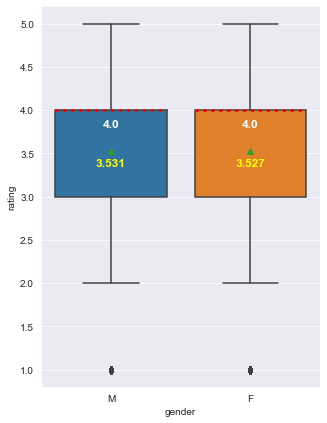

In [10]:
plt.figure(figsize=(5,7)) #Setting the size of the figure
sns.set_style("darkgrid") #Gives us a dark grid background
box_plot= sns.boxplot(x='gender', y='rating',data=df, showmeans = True, medianprops={'color': 'red', 'ls': ':', 'lw': 3}) 
#The above code creates a boxplot.

# Code to show the median and mean value on the boxplot
# Code reference: https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value
medians = df.groupby(['gender'])['rating'].median() #Calculate the median and stores int in variable medians
vertical_offset = df['rating'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] - vertical_offset,medians[xtick], 
            horizontalalignment='center',size=12,color='white',weight='bold')
    
means = df.groupby(['gender'])['rating'].mean() #Calculate the mean and stores int in variable means
means = means.round(3) #Rounding mean to 3 Decimal Place
vertical_offset1 = df['rating'].mean() * 0.05 # offset from mean for display

for xtick1 in box_plot.get_xticks():
    box_plot.text(xtick1,means[xtick1] - vertical_offset1,means[xtick1], 
            horizontalalignment='center',size=12,color='Yellow',weight='bold')

#### Observation and Findings
The horizontal box-plot above helps us investigate the correlation between gender and ratings. The figure for both male and female seems identical as we do not see any visual evidence which suggests that a certain gender gave higher average ratings. The red probs in the diagram shows the median of the boxplot which is 4.0 for both males and females. The exact median value is also shown in the white text below the probs. The mean is shown by a small green triangle  which appears to be the same for both genders. However, if we take the exact value of the mean into account (Shown by the yellow text), we noticed that females  had a higher average rating (3.527) than males (3.531). Although the differences between the mean isn't very large, we can conclude that females tend to give higher ratings based on the mean value calculated.

### Histogram based on Gender and its Ratings

Male users: 73669
Female users: 25353


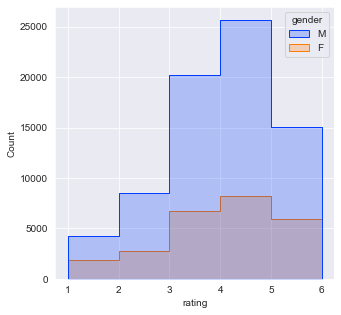

In [11]:
plt.figure(figsize=(5,5)) #Figure Size
sns.histplot(x='rating',data=df,binwidth=1,binrange=(1,6),stat='count',hue='gender',element='step',palette="bright");
#Histogram Code

print("Male users:",len(df[df['gender']=='M'])) #Prints the number of male users
print("Female users:",len(df[df['gender']=='F'])) #Prints the number of male users

#### Observation
Looking at the histogram shown in the figure above, we can observe that both the histogram has a similar shape, however, the size of males were way bigger than that of females. Upon calling the len function, we can conclude that there are more male users (73,669) than female (25,353).

## Boxplot based on Genre and its Ratings

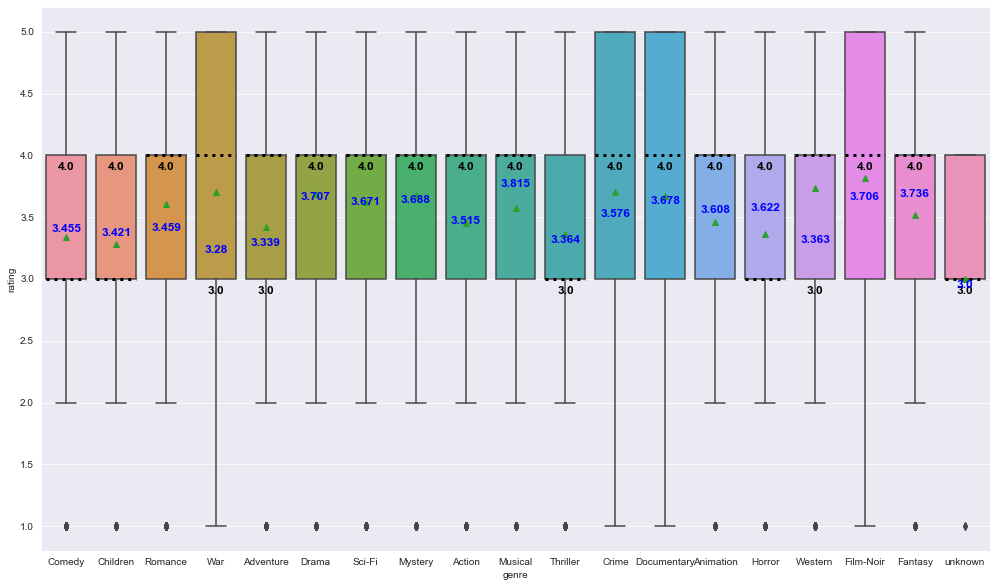

In [12]:
plt.figure(figsize=(17,10)) #Figure Size
genre_box_plot=sns.boxplot(x='genre', y='rating',data=df, showmeans=True,medianprops={'color': 'black', 'ls': ':', 'lw': 3})
#Boxplot created and stored in the variable genre_box_plot

# Code to show the median and mean value on the boxplot
# Code reference: https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value
genreMedians = df.groupby(['genre'])['rating'].median() #Calculates the median and stores it in genreMedians
genre_offset = df['rating'].median() * 0.03 # offset from median for display

for xtick in genre_box_plot.get_xticks(): #Displays the median value in each boxplot through a loop
    genre_box_plot.text(xtick,genreMedians[xtick] - genre_offset,genreMedians[xtick], 
            horizontalalignment='center',size=12,color='Black',weight='bold')
    
genreMeans = df.groupby(['genre'])['rating'].mean()
genreMeans = genreMeans.round(3)
genre_offset1 = df['rating'].mean() * 0.02 # offset from mean for display

for xtick in genre_box_plot.get_xticks(): #Displays the mean value in each boxplot through a loop
    genre_box_plot.text(xtick,genreMeans[xtick] - genre_offset1,genreMeans[xtick], 
            horizontalalignment='center',size=12,color='Blue',weight='bold')
    


#### Observation and Findings
The horizontal box-plot above helps us investigate the correlation between genre and ratings. Looking at a first glance, we notice that genres such as War, Crime, Documentary and Film-Noir had the highest range compared to the other genres. The blue text inside the box-plot gives us the value of the mean while the black text provides us the median value. Looking at the medians, genres such as war, adventure, crime, documentary and Western had lower median value (3) which might suggest that these genres are less liked. Looking at the mean value, we can see that Musical genre (3.815) followed by fantasy (3.736) had the highest average rating whereas the War genre had the lowest rating mean (3.28). This data might suggest that people love musical and fantasy genre as they might allow them to engage and experiment with different ways of seeing the world. The reason for war related movies having lower ratings might be because it contains violence and it might not be suitable for all ages.

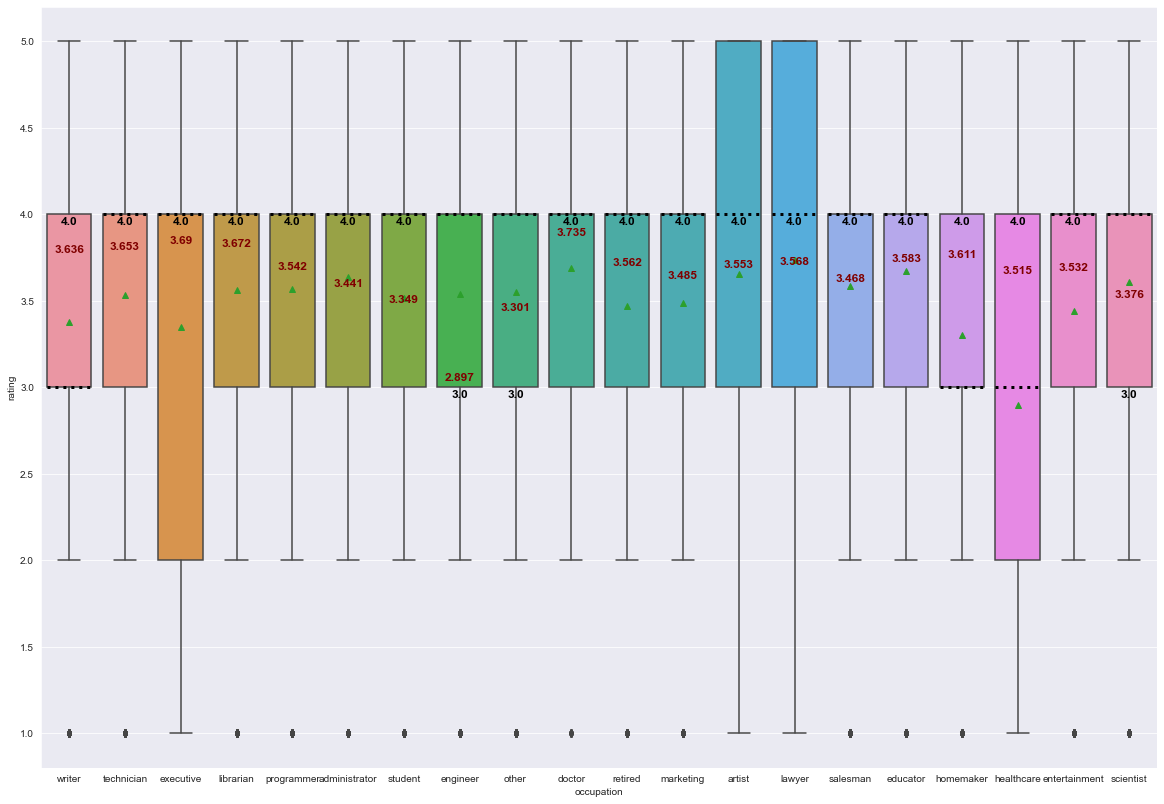

In [13]:
plt.figure(figsize=(20,14)) #Figure Size
occupation_box_plot=sns.boxplot(x='occupation', y='rating',data=df,showmeans=True,medianprops={'color': 'black', 'ls': ':', 'lw': 3})

# Code to show the median and mean value on the boxplot
# Code reference: https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value
occupationMedians = df.groupby(['occupation'])['rating'].median()
occupation_offset = df['rating'].median() * 0.015 # offset from median for display

for xtick in occupation_box_plot.get_xticks():
    occupation_box_plot.text(xtick,occupationMedians[xtick] - occupation_offset,occupationMedians[xtick], 
            horizontalalignment='center',size=12,color='Black',weight='bold')
    
occupationMeans = df.groupby(['occupation'])['rating'].mean()
occupationMeans = occupationMeans.round(3)
occupation_offset1 = df['rating'].mean() * 0.04 # offset from mean for display

for xtick in occupation_box_plot.get_xticks():
    occupation_box_plot.text(xtick,occupationMeans[xtick] + occupation_offset1,occupationMeans[xtick], 
            horizontalalignment='center',size=12,color='Maroon',weight='bold')
    

#### Observation and Findings
The horizontal box-plot above helps us investigate the correlation between occupation and ratings. On a first glance, we notice that user with occupation such as executive, artist, lawyer and healthcare had the highest variability. The maroon text provides us the value of the mean while the black text shows us the median value. We cannot get a lot of information from the medians as the value ranges from 3-4 only. Therefore, it is easier to compare while looking at the mean. We can observe that doctors gave the highest average rating (3.735) while engineers gave the lowest mean rating (2.897). However, while looking at the mean, we should also take sample size into account and remove outliers. For example, if a user has revied only one movie and given it a 5 star, then his mean rating would be 5 (The highest). Outliers such as these should be removed. This is done in the following section of the assignment.

#### Q4. Detect and remove outliers

We may define outlier users and movies with three rules:

* users whose age is no more than 10
* users who rate less than 20 movies
* movies that receives less than 10 ratings (i.e., movies that are rated by less than 10 users)
 
Please remove the corresponding records in the csv file that involves outlier users and movies. After that, __print the length of the data__.

In [14]:
# Q4.1 users whose age is no more than 10
age_outlier=df.index[df['age']<=10] #Condition for age outlier is stored in a variable for better readability
df2 = df.drop(age_outlier) #df2 is the new filtered dataframe which doesn't contain the age outliers

#Printing the before and the after results of removing the outliers 
print("Number of Users whose age is no more than 10:",len(df[df['age']<=10])) 
print("Previous mean:",df['age'].mean()) 
print("Current mean:",df2['age'].mean())
print("Previous Length:",len(df))
print("Current Length:",len(df2))
print("Filtered out rows:",len(df)-len(df2))



Number of Users whose age is no more than 10: 74
Previous mean: 33.04260669346206
Current mean: 33.06114322674536
Previous Length: 99022
Current Length: 98948
Filtered out rows: 74


* 74 outliers were filtered out

In [15]:
# Q4.2 users who rate less than 20 movies
grouped_data = df2.groupby( ["userId"] ) #grouped_data variable used to store the group by series
gdf=pd.DataFrame(grouped_data.size().reset_index(name = "Group_Count")) #converting the series into a dataframe
gdf=gdf[gdf['Group_Count']>=20] #This dataframe contains all users whose has rated equal to or more than 20 movies (No outliers).
df3 = df2[df2.userId.isin(gdf.userId)] 
'''df3 will only contain the data of the userId present in the gdf dataframe. 
This means the outliers (users rating less than 20 movies) are filtered out.'''

#Printing the before and the after results of removing the outliers 
print("Previous mean:",df2['age'].mean()) 
print("Current mean:",df3['age'].mean())
print("Previous Length:",len(df2))
print("Current Length:",len(df3))
print("Filtered out rows:",len(df2)-len(df3))

Previous mean: 33.06114322674536
Current mean: 33.05846617270972
Previous Length: 98948
Current Length: 98929
Filtered out rows: 19


* 19 outliers were filtered out

In [16]:
# Q4.3 movies that receives less than 10 ratings (i.e., movies that are rated by less than 10 users)
grouped_data2 = df3.groupby( ["movieId"] ) #grouped_data2 sotres the group by series of df3

gdf2=pd.DataFrame(grouped_data2.size().reset_index(name = "User_Count")) #grouped_data2 is put into a dataframe gdf2
gdf2=gdf2[gdf2['User_Count']>9] #gdf contains data with no outliers (movies that receives less than 10 ratings)
df4 = df3[df3.userId.isin(gdf2.movieId)]
'''df4 will only contain the data of the movieId present in the gdf2 dataframe. 
This means the outliers (movies rated by less than 10 users) are filtered out.'''

#Printing the before and the after results of removing the outliers 
print("Previous mean:",df3['age'].mean()) 
print("Current mean:",df4['age'].mean())
print("Previous Length:",len(df3))
print("Current Length:",len(df4))
print("Filtered out rows:",len(df3)-len(df4))

Previous mean: 33.05846617270972
Current mean: 33.14249625441541
Previous Length: 98929
Current Length: 91441
Filtered out rows: 7488


In [17]:
#Checking the number of outliers removed
print("Filtered out:",len(df3)-len(df4))

Filtered out: 7488


* 7488 outliers were filtered out

In [18]:
#Displaying the Final filtered Table
df4

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
2,22,25.0,M,writer,377,1.0,Children,878887116
3,244,28.0,M,technician,51,2.0,Romance,880606923
5,298,44.0,M,executive,474,4.0,War,884182806
7,253,26.0,F,librarian,465,5.0,Adventure,891628467
...,...,...,...,...,...,...,...,...
99995,880,13.0,M,student,476,3.0,Comedy,880175444
99996,716,36.0,F,administrator,204,5.0,Sci-Fi,879795543
99997,276,21.0,M,student,1090,1.0,Thriller,874795795
99998,13,47.0,M,educator,225,2.0,Comedy,882399156


In [21]:
#Saving the cleaned data for Portfolio Part 2
df4.to_csv('files/movielens_data_clean.csv',index=False)